In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
bike_data = pd.read_csv("../data_folder/bikes.csv")
bike_data.head()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [4]:
bike_data.describe()

,real_temperature,feel_temperature,humidity,wind_speed,count
count,730.000000,657.000000,730.000000,730.000000,730.000000
mean,12.481849,11.506088,73.034932,15.954665,27268.454795
std,5.086471,6.110233,10.245519,6.221691,8607.700254
min,0.250000,-2.000000,40.500000,2.770833,4869.000000
25%,8.812500,6.250000,65.250000,11.208333,21940.750000
50%,12.625000,12.500000,73.750000,15.166667,27011.500000
75%,16.187500,16.000000,80.750000,19.906250,33431.250000
max,28.500000,29.000000,100.000000,41.900000,72504.000000


In [5]:
bike_data.shape

(730, 10)

In [6]:
#Get median for feel_temp
median_feel_temperature = bike_data["feel_temperature"].median()
bike_data["feel_temperature"] = bike_data["feel_temperature"].fillna(median_feel_temperature)
bike_data

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [8]:
#Filling missing values for season column by padding
bike_data["season"] = bike_data["season"].interpolate(method='pad')


In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [10]:
bike_data['weather_code'].unique()

array(['broken_clouds', 'clear', 'scattered_clouds', 'rain', nan,
       'cloudy', 'snowfall'], dtype=object)

In [11]:
mode_value = bike_data["weather_code"].mode()[0]
bike_data["weather_code"] = bike_data["weather_code"].fillna(mode_value)
bike_data

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


In [12]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  730 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      730 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            730 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [13]:
bike_data.head(20)

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
5,09/01/2015,13.00,13.00,75.75,32.916667,broken_clouds,False,False,winter,22104
6,10/01/2015,11.50,11.50,66.75,34.312500,broken_clouds,False,True,winter,14709
7,11/01/2015,7.75,3.75,69.00,26.562500,clear,False,True,winter,14575
8,12/01/2015,11.50,11.50,76.50,28.187500,rain,False,False,winter,17199
9,13/01/2015,9.00,6.00,74.75,21.208333,rain,False,False,winter,24697


In [14]:
bike_data.select_dtypes(include='object')

,date,weather_code,season
0,04/01/2015,broken_clouds,winter
1,05/01/2015,broken_clouds,winter
2,06/01/2015,clear,winter
3,07/01/2015,scattered_clouds,winter
4,08/01/2015,rain,winter
...,...,...,...
725,30/12/2016,cloudy,winter
726,31/12/2016,cloudy,winter
727,01/01/2017,rain,winter
728,02/01/2017,clear,winter


In [15]:
#One-hot encoding for season column

#Fetch the season data as new df
season_data = pd.DataFrame(bike_data["season"], columns=['season'])
#create a on-hot encoder object
one_hot_encode = OneHotEncoder()

#encode the season column
ohe_array = one_hot_encode.fit_transform(season_data[['season']]).toarray()

#COL_NAME= OHE_ARRAY.GET
col_names = one_hot_encode.get_feature_names_out(['season'])

#covert the array to a data frame
ohe_season_data =  pd.DataFrame(data=ohe_array, columns=col_names)

season_data = pd.concat([season_data, ohe_season_data],axis=1)

In [16]:
season_data

,season,season_autumm,season_spring,season_summer,season_winter
0,winter,0.0,0.0,0.0,1.0
1,winter,0.0,0.0,0.0,1.0
2,winter,0.0,0.0,0.0,1.0
3,winter,0.0,0.0,0.0,1.0
4,winter,0.0,0.0,0.0,1.0
...,...,...,...,...,...
725,winter,0.0,0.0,0.0,1.0
726,winter,0.0,0.0,0.0,1.0
727,winter,0.0,0.0,0.0,1.0
728,winter,0.0,0.0,0.0,1.0


In [17]:
season_data.sample(7)

,season,season_autumm,season_spring,season_summer,season_winter
586,summer,0.0,0.0,1.0,0.0
201,summer,0.0,0.0,1.0,0.0
595,summer,0.0,0.0,1.0,0.0
701,winter,0.0,0.0,0.0,1.0
375,winter,0.0,0.0,0.0,1.0
60,spring,0.0,1.0,0.0,0.0
691,autumm,1.0,0.0,0.0,0.0


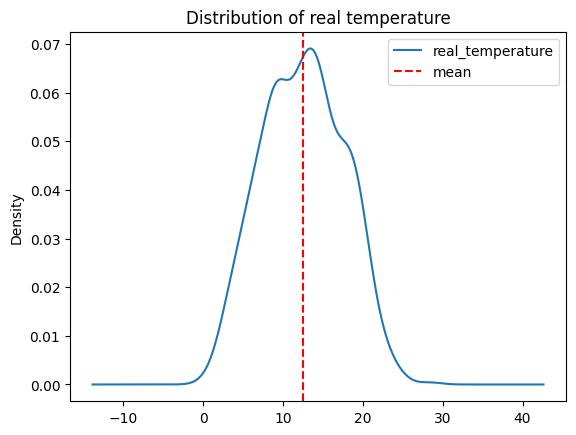

In [18]:
#create a density plot to visualize distribution.
ax = bike_data['real_temperature'].plot.density(title='Distribution of real temperature', label='real_temperature')

mean_real_temp = bike_data['real_temperature'].mean()

plt.axvline(x=mean_real_temp, color='r', linestyle='--',label='mean')
ax.legend()

In [20]:
#create a standars scaler object
std_scaler = StandardScaler()

#standardize the real temp column
bike_data['scaled_real_temp']=std_scaler.fit_transform(X=bike_data[['real_temperature']])



In [21]:
bike_data[['real_temperature','scaled_real_temp']]

,real_temperature,scaled_real_temp
0,2.75,-1.914593
1,9.00,-0.685001
2,8.00,-0.881736
3,9.00,-0.685001
4,9.00,-0.685001
...,...,...
725,4.00,-1.668675
726,7.50,-0.980103
727,7.00,-1.078470
728,3.25,-1.816226


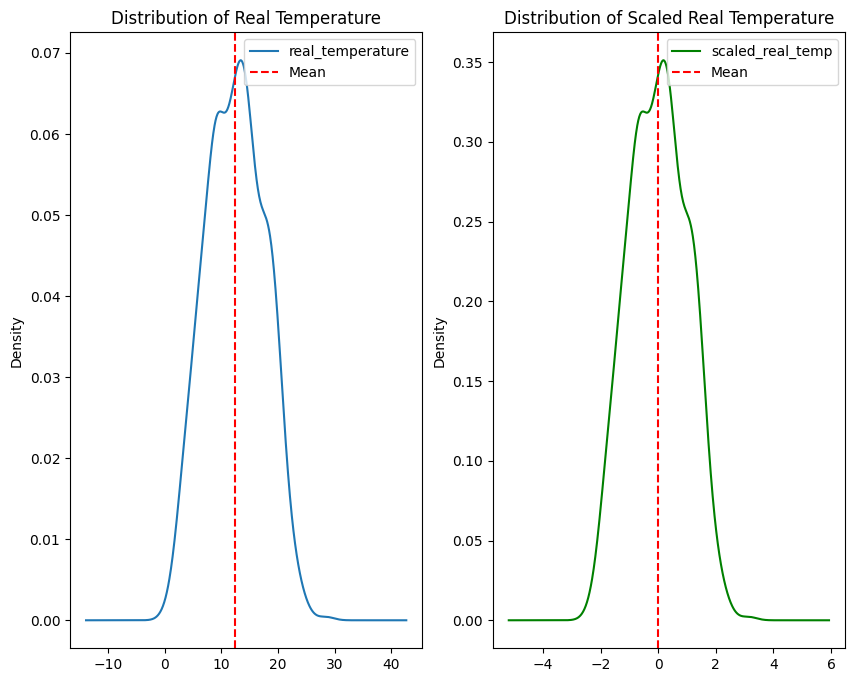

In [27]:
import matplotlib.pyplot as plt

# Create figure and two subplot axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))

# --- Plot 1: Real Temperature Distribution ---
bike_data['real_temperature'].plot.density(
    ax=ax1,
    title='Distribution of Real Temperature',
    label='real_temperature'
)

# Add mean line
mean_real_temp = bike_data['real_temperature'].mean()
ax1.axvline(x=mean_real_temp, color='r', linestyle='--', label='Mean')
ax1.legend()

# --- Plot 2: Scaled Real Temperature Distribution ---
bike_data['scaled_real_temp'].plot.density(
    ax=ax2,
    title='Distribution of Scaled Real Temperature',
    label='scaled_real_temp',
    color='green'
)

# Add mean line for scaled
mean_scaled = bike_data['scaled_real_temp'].mean()
ax2.axvline(x=mean_scaled, color='r', linestyle='--', label='Mean')
ax2.legend()



### Feature Selection

In [33]:
#create a correlation matrix for the numerical variable
num_variables = bike_data.select_dtypes(include='number')

#create a correlation matrix
corr_matrix= num_variables.corr()
#make a heatmap out of the cor_matrix
corr_matrix.style.background_gradient(cmap='coolwarm')

,real_temperature,feel_temperature,humidity,wind_speed,count,scaled_real_temp
real_temperature,1.000000,0.931534,-0.373399,0.045599,0.669005,1.000000
feel_temperature,0.931534,1.000000,-0.335451,0.012961,0.636596,0.931534
humidity,-0.373399,-0.335451,1.000000,-0.191216,-0.539293,-0.373399
wind_speed,0.045599,0.012961,-0.191216,1.000000,-0.197499,0.045599
count,0.669005,0.636596,-0.539293,-0.197499,1.000000,0.669005
scaled_real_temp,1.000000,0.931534,-0.373399,0.045599,0.669005,1.000000


In [30]:
num_variables.head()

,real_temperature,feel_temperature,humidity,wind_speed,count,scaled_real_temp
0,2.75,0.00,93.00,7.500000,9234,-1.914593
1,9.00,7.25,81.50,8.854167,20372,-0.685001
2,8.00,5.75,79.75,16.000000,20613,-0.881736
3,9.00,5.50,81.00,19.760870,21064,-0.685001
4,9.00,6.75,79.50,20.479167,15601,-0.685001


In [ ]:
q